In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reads all the data and changes the indices to the date columns and changes the date format as well
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)

In [5]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['AAPL', 'CISCO', 'IBM', 'AMZN']

In [6]:
stocks.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [7]:
stocks.pct_change(1).mean()

AAPL     0.000750
CISCO    0.000599
IBM      0.000081
AMZN     0.001328
dtype: float64

In [8]:
stocks.pct_change(1).corr()

,AAPL,CISCO,IBM,AMZN
AAPL,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


In [9]:
stocks.pct_change().head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [10]:
# Logarithmic Return
log_ret = np.log(stocks/stocks.shift())
log_ret.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


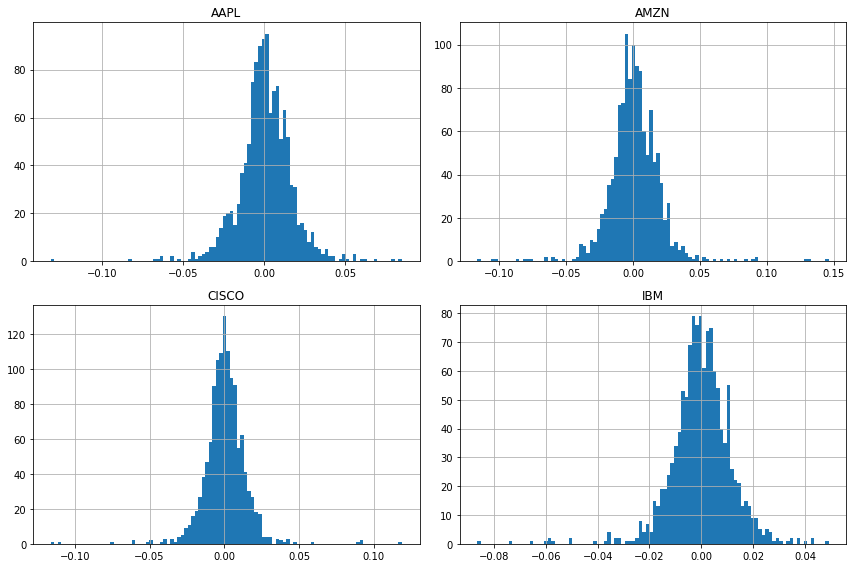

In [11]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [12]:
log_ret.mean()

AAPL     0.000614
CISCO    0.000497
IBM      0.000011
AMZN     0.001139
dtype: float64

In [14]:
log_ret.cov() * 252 # Anual business days

,AAPL,CISCO,IBM,AMZN
AAPL,0.068326,0.017854,0.014464,0.018986
CISCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
AMZN,0.018986,0.019956,0.014939,0.094470


In [21]:
np.random.seed(101)

print(stocks.columns)
weights = np.array(np.random.random(4))
print('Random Weights:')
print(weights)
print('Rebalance:')
weights = weights / np.sum(weights) # Normalizes Weights (added up to one)
print(weights)

# Expected Return
print('Expected Portfolio Return:')
exp_ret = np.sum((log_ret.mean() * weights) * 252) # for a year
print(exp_ret)

# Expected Volatility
print('Expected Volatility:')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio:')
SR = exp_ret / exp_vol
print(SR)

Index(['AAPL', 'CISCO', 'IBM', 'AMZN'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance:
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return:
0.15599272049632004
Expected Volatility:
0.18502649565909488
Sharpe Ratio:
0.8430831483926032


In [22]:
# Monte Carlo Method
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights) # Normalizes Weights (added up to one)
    # Save Weights
    all_weights[ind, :] = weights
    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252) # for a year
    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [23]:
sharpe_arr.max()

1.0303260551271067

In [24]:
sharpe_arr.argmax()

1420

In [29]:
all_weights[1420,:]
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

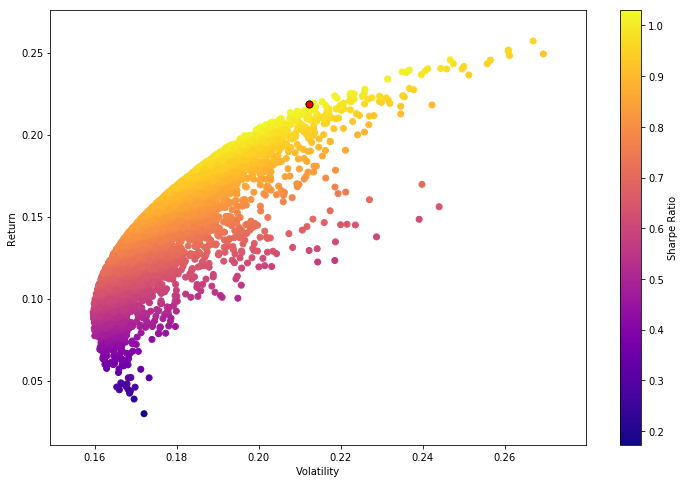

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

In [31]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [32]:
from scipy.optimize import minimize

In [33]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [34]:
# Constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [35]:
cons = ({'type':'eq','fun': check_sum})
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
init_guess = [0.25,0.25,0.25,0.25]

In [36]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [37]:
opt_results

     fun: -1.030716870334955
     jac: array([ 5.64455986e-05,  4.18275595e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289778e-01, 2.04189819e-01, 9.24621165e-17, 5.29520404e-01])

In [38]:
opt_results.x

array([2.66289778e-01, 2.04189819e-01, 9.24621165e-17, 5.29520404e-01])

In [39]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [43]:
frontier_y = np.linspace(0,.3, 100)

In [41]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [44]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

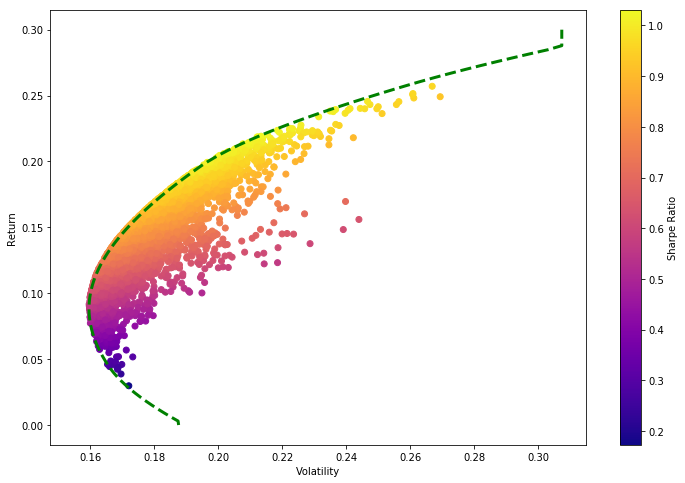

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)